# Assignment - APRAU Group 1

## Student - Student number

Ladislav Gardian - 1240524  
Lars van der Griend - 1240271  
Peter Likavec - 1240523 

## Github

Github Repository - https://github.com/larsvdg/APRAU/ 

ToDo
- uncomment Lasso/Ridge
- comment on correlation decision trees vs univariate vs bivariate analysis

In [190]:
# Importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

For every group, three datasets where available for creating a model to predict the Vegetaton Type. This classification problem will be solved by applying Machine Learning models. To train and test such Machine Learning models, all three datasets are loaded and merged into one big dataset which will be used in the rest of the Notebook. It is already important to mention that the merged dataset is imbalanced. The number of classes of Vegetation Type 1, 2 and 3 is not equal.

In [191]:
# Load data from the three available datasets for Group 1
df_1 = pd.read_csv("Data_Class_1.csv")
df_2 = pd.read_csv("Data_Class_2.csv")
df_3 = pd.read_csv("Data_Class_3.csv")

In [192]:
# Merging the DataFrames 
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

type_counts = df['Vegetation_Type'].value_counts().reset_index()
type_counts.columns = ['Vegetation_Type', 'Count']

type_counts


,Vegetation_Type,Count
0,Type_1,2160
1,Type_3,1620
2,Type_2,1404


In [193]:
df.head()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level,Soil_Type,Wilderness_Area,Vegetation_Type
0,41,2699,347,3,0,0,2096,213,234,159,6853,37.32,282.46,125.22,6.23,Type_20,Area_1,Type_1
1,52,2739,323,25,85,43,3118,149,205,192,6219,76.51,182.57,532.19,30.65,Type_29,Area_1,Type_1
2,53,2696,72,2,30,0,3271,222,234,149,6071,86.37,374.79,275.52,59.96,Type_30,Area_1,Type_1
3,56,2722,315,24,30,19,3216,148,212,200,6132,85.31,364.30,1182.48,22.21,Type_16,Area_1,Type_1
4,68,2919,13,13,90,6,5321,207,214,142,4060,78.13,303.26,1198.69,14.22,Type_29,Area_1,Type_1


## Exploratory Analysis

To get a better understanding of the data, an exploratory analysis of the dataset will be done. This exploratory analysis can give prior insights on the data, can help understand the data structure and dimensions better, and much more. The subsections below will guide through this exploratory analysis in steps.  

### Descriptive Statistics and Data Types 
Using built-in Python functions, the descriptive statistics of all numerical columns in the dataset can be summarized, see the Table below. The *count* for every column equals 5184, indicating that there are no missing values. Furthermore, the data type per column is shown. Excluding the target variable *Vegetation_Type*, there are two more categorical columns; *Soil_Type* and *Wilderness_Area*. The other columns all contain numerical values. Moreover, the number of unique values per column is shown.

In [194]:
df.describe()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.000000
mean,7510.204861,2843.550926,161.878665,15.517554,256.798997,49.864198,2035.544367,209.343943,221.727238,142.834298,1708.383488,60.076663,299.36472,645.818277,34.885449
std,4624.413034,357.981922,111.928353,8.307825,199.066593,57.863126,1515.358119,31.160176,21.742296,41.390832,1248.504473,17.307780,87.00860,323.909683,17.445434
min,3.000000,1903.000000,0.000000,1.000000,0.000000,-146.000000,0.000000,58.000000,115.000000,0.000000,30.000000,30.000000,150.07000,90.070000,5.000000
25%,2978.500000,2561.750000,63.000000,9.000000,108.000000,9.000000,870.000000,194.750000,211.000000,117.000000,806.750000,45.125000,223.50750,357.600000,19.600000
50%,8273.500000,2935.000000,137.000000,14.000000,216.000000,34.000000,1572.500000,217.000000,225.000000,143.000000,1395.500000,60.160000,300.21500,645.960000,34.880000
75%,11262.250000,3136.250000,271.000000,21.000000,361.000000,75.000000,2916.250000,232.000000,237.000000,171.000000,2292.000000,75.115000,374.62250,933.370000,50.275000
max,15118.000000,3675.000000,360.000000,47.000000,1343.000000,547.000000,6836.000000,254.000000,254.000000,248.000000,6993.000000,89.980000,449.98000,1199.880000,64.990000


In [195]:
# Check data types and missing values
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

data_info

,Data Type,Missing Values,Unique Values
Id,int64,0,5184
Altitude,int64,0,1359
Slope_Orientation,int64,0,361
Slope,int64,0,46
Horizontal_Distance_To_Water,int64,0,290
Vertical_Distance_To_Water,int64,0,338
Horizontal_Distance_To_Roadways,int64,0,2346
Shadow_Index_9h,int64,0,170
Shadow_Index_12h,int64,0,127
Shadow_Index_15h,int64,0,232


### Univariate Analysis

Now the distribution of the data in individual columns (i.e., features) can be investigated. Understanding the distributions of the features is relevant for later data analysis. Based on the distribution of the features, different methods should be applied. First, the distribution of the numerical features will be checked by creating histograms. The density curves are added to help understand the distributions. As can be seen, the features all have different distributions. Some Uniform, Gamma, Normal and other distributions can be recognized.

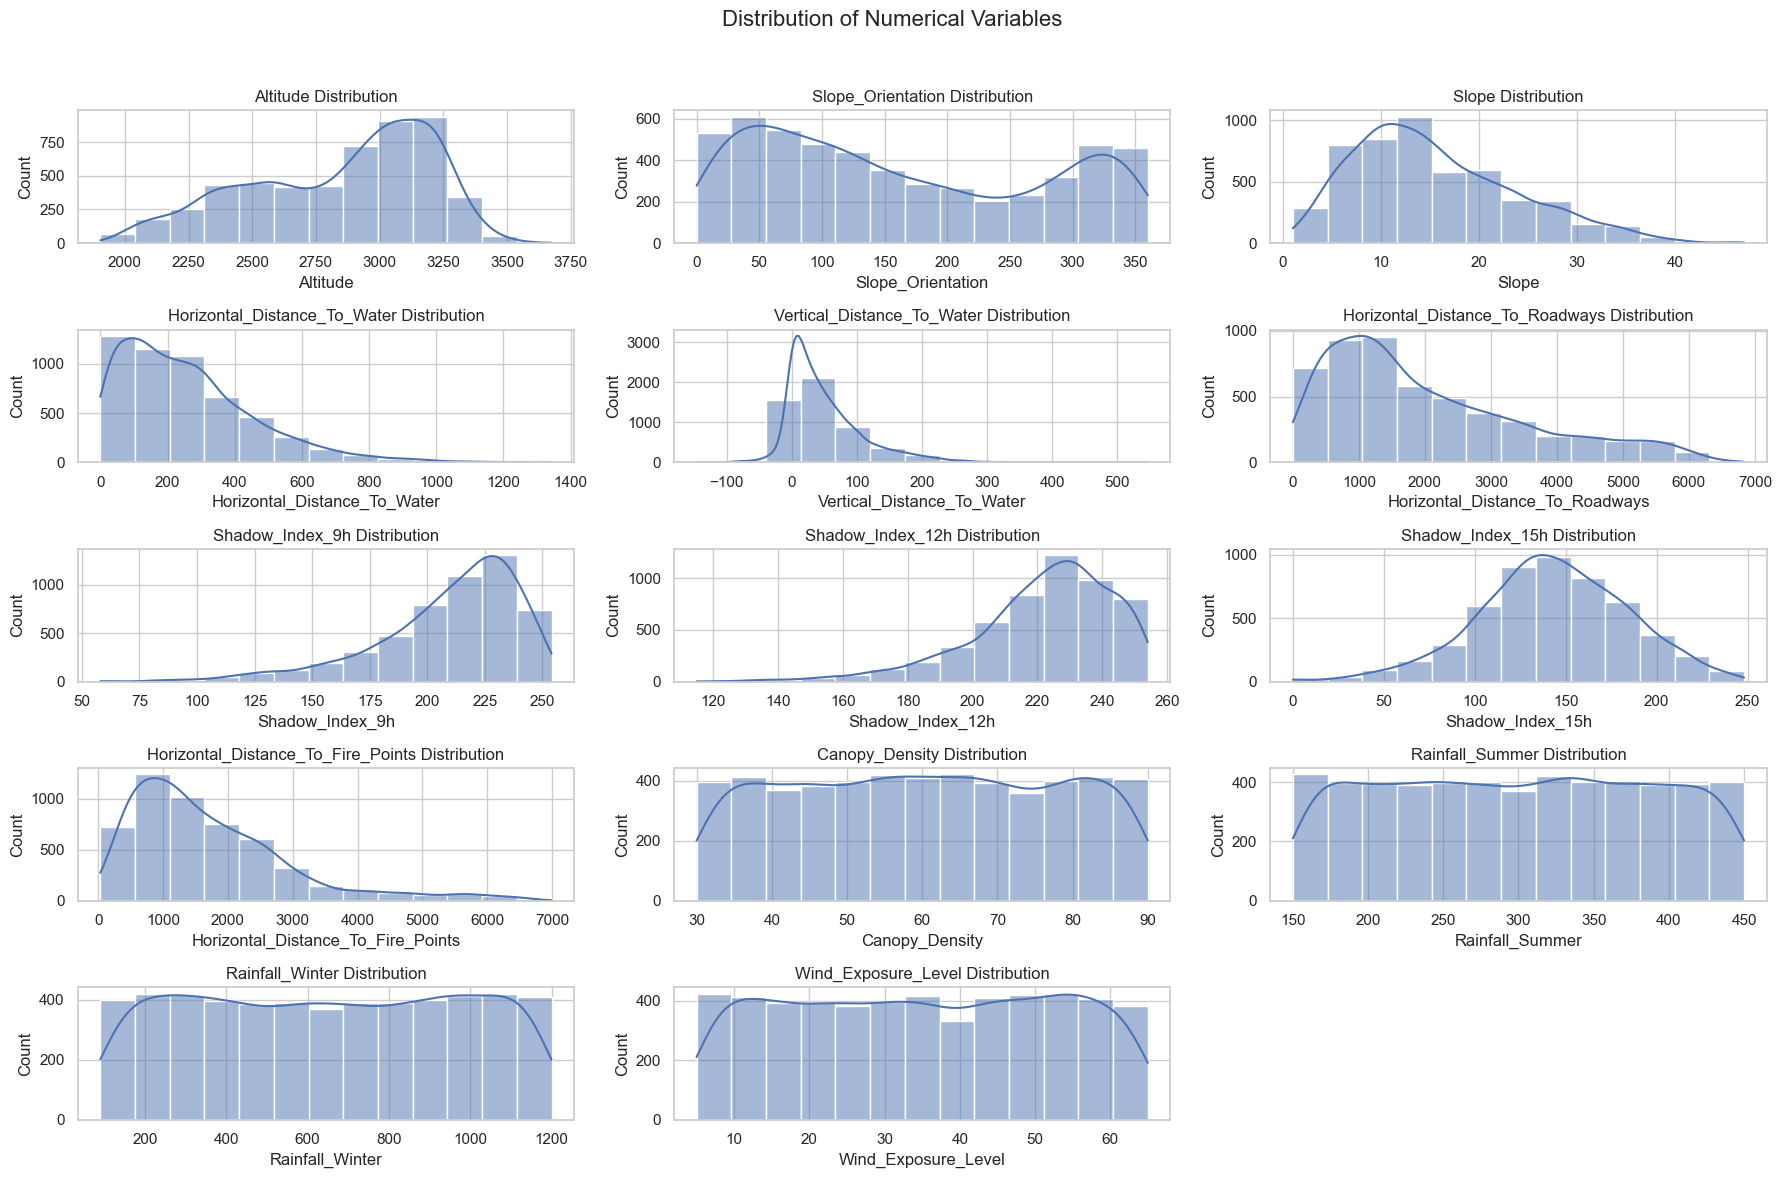

In [196]:
# Set the style for the visualizations
sns.set(style="whitegrid")

# List of numerical columns to plot
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope', 
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water', 
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 
    'Shadow_Index_12h', 'Shadow_Index_15h', 
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'
]

# Set up the subplots, adjusting number of rows and columns to fit all features
num_plots = len(numerical_columns)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.histplot(df[col], kde=True, bins=int(np.round(np.log2(len(df)) + 1)), ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution')

# Hide any unused subplots
for i in range(num_plots, rows * cols):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Now, using barcharts the distribution of the non-numerical features (excluding the target variable) can be visualized. It can be seen that for the *Soil_Type* some values occur very often, and some occur only a few times. The *Wilderness_Area* distribution is a bit skewed as well.

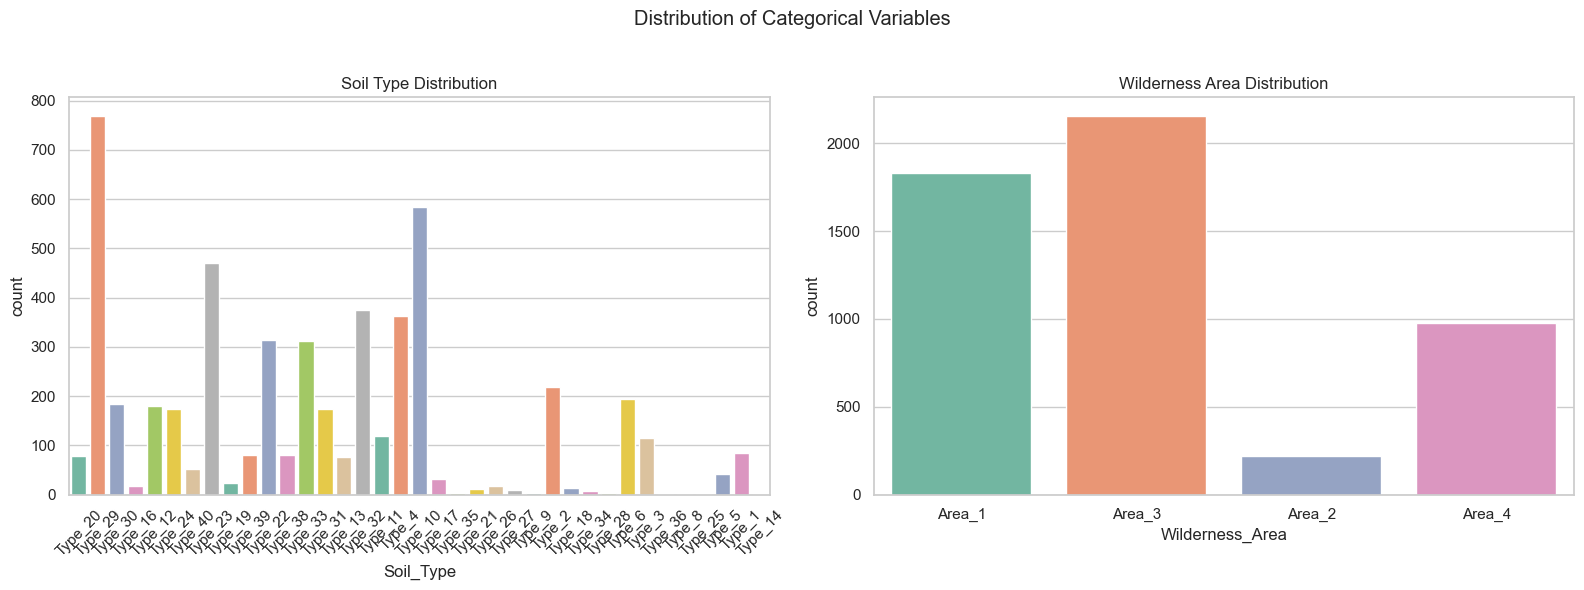

In [197]:
# Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Categorical Variables')

sns.countplot(x='Soil_Type', data=df, ax=axes[0], palette='Set2')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Soil Type Distribution')

sns.countplot(x='Wilderness_Area', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Wilderness Area Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Bivariate Analysis 
Now we can investigate the relationship between the individual features and the Vegetation Type. Since the problem of predicting the *Vegetation_Type* is a classification problem, to identify patterns between the numerical variables and target variable, violinplots are used. Violinplots give the distribution of the numerical value, given the target variable *Vegetation_Type*.

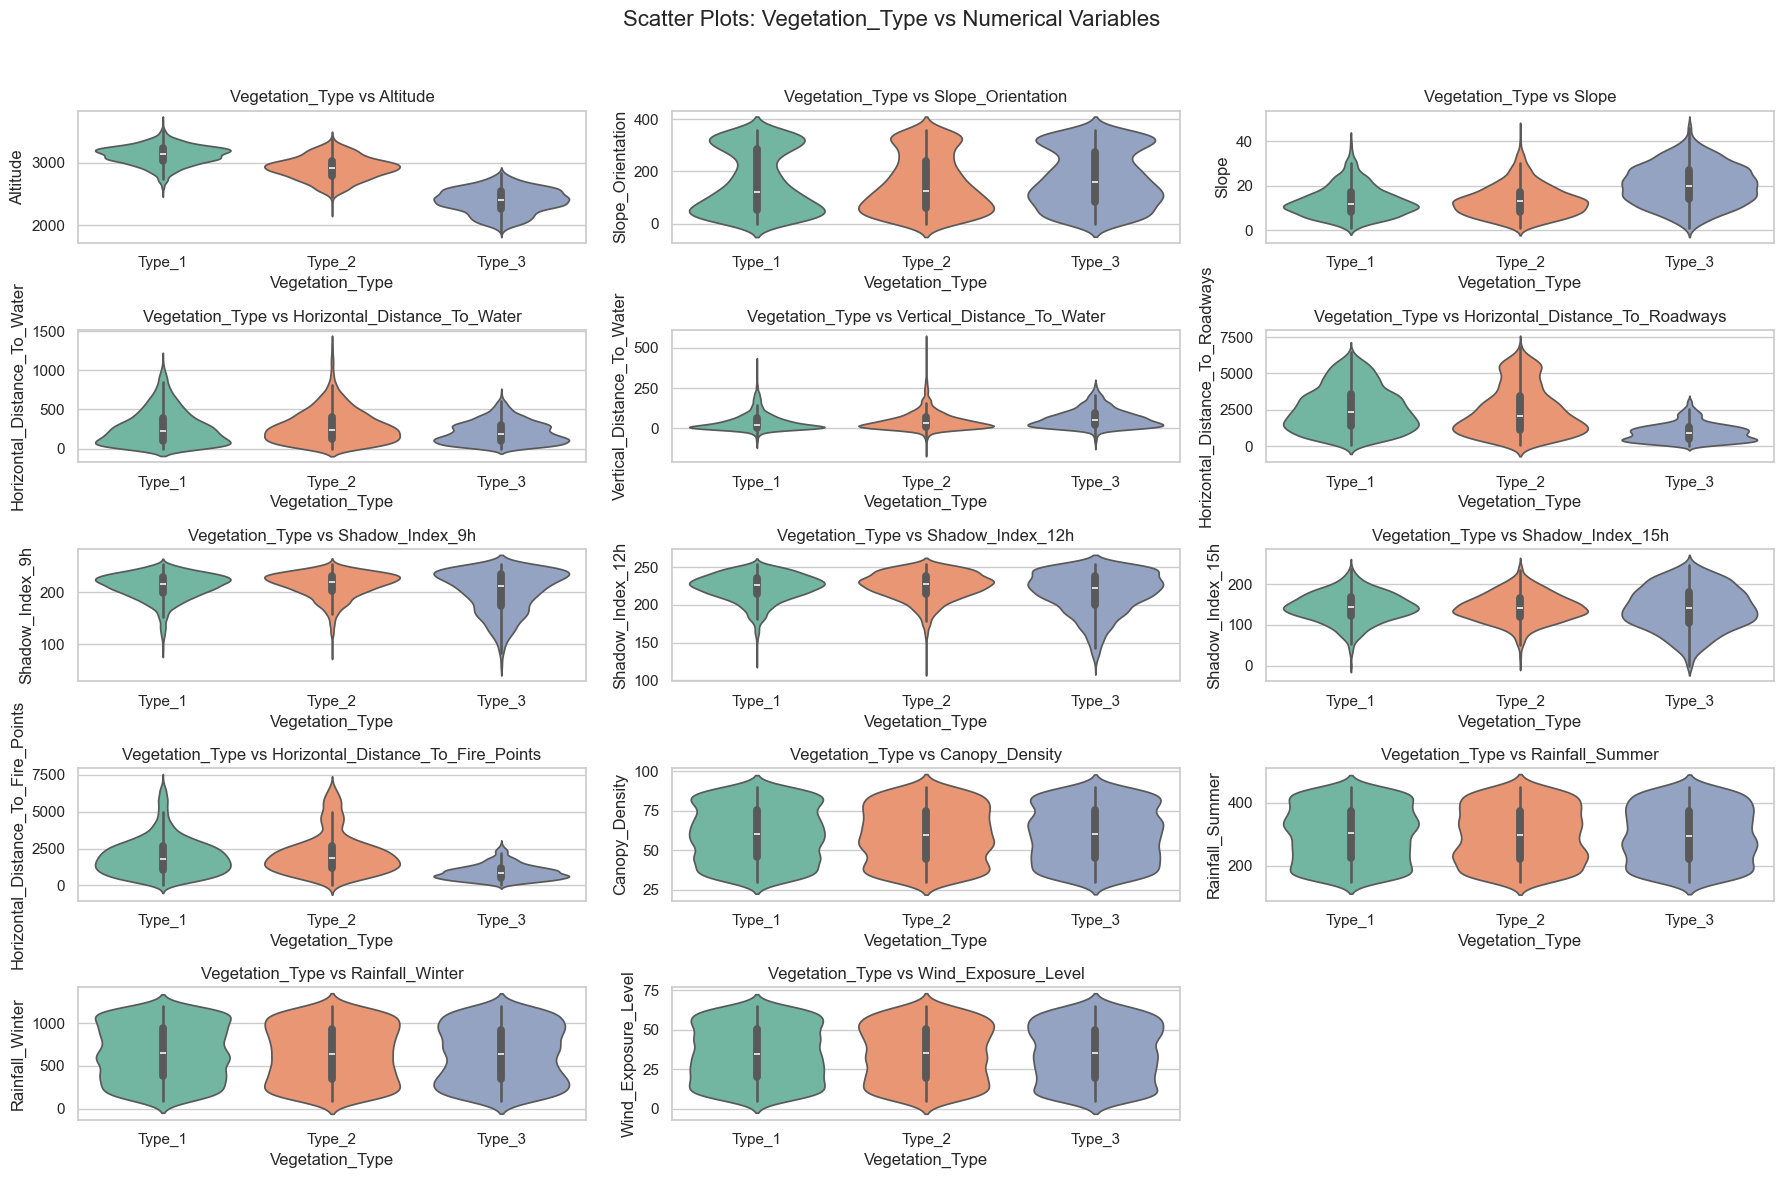

In [198]:
# Set up the subplots, adjusting number of rows and columns to fit all features
num_plots = len(numerical_columns)
cols = 3  # Number of columns in the grid
rows = num_plots // cols + (num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
fig.suptitle('Scatter Plots: Vegetation_Type vs Numerical Variables', fontsize=16)

# Plot violoinplots for each numerical feature against the target variable 'Vegetation_Type'
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.violinplot(x=df['Vegetation_Type'], y=df[col], ax=axes[row, col_idx], palette='Set2')  # Vegetation_Type on x-axis
    axes[row, col_idx].set_title(f'Vegetation_Type vs {col}')
    axes[row, col_idx].set_xlabel('Vegetation_Type')  
    axes[row, col_idx].set_ylabel(col)  

# Hide any unused subplots (in case the grid has extra slots)
if num_plots % cols != 0:  # Only if there are unused subplots
    for j in range(num_plots, rows * cols):
        fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The violinplots give some insight in the distribution of the feature data per target variable class. However, we must also check for outliers, which is harder with these violinplots. This can better be done using boxplots. Since feature values can differ per *Vegetation_Type*, the boxplots will be shown per feature, per *Vegetation_Type*. This will give the best insights in possible outliers.  

Outliers are identified as points below Q1 - 1.5xIQR or above Q3 + 1.5xIQR. As can be seen from the plots, there are multiple data points identified as outliers. However, these points are often close together. This indicates that the majority of these outliers are not likely to be caused by measurement errors. Moreover, deleting all of these points could result in a severe information loss since the size of the dataset will heavily decrease. Outliers could also be replaced by the mean or median of the feature. However, as earlier explained, the majority of the points are grouped together, indicating that these values can be valuable in the data analysis. Furthermore, there are a few big outliers. Since this are only a few points (in all features combined) per *Vegetation_Type*, these values are kept in the dataset since these can be rare values and can give valuable insights in the analysis.

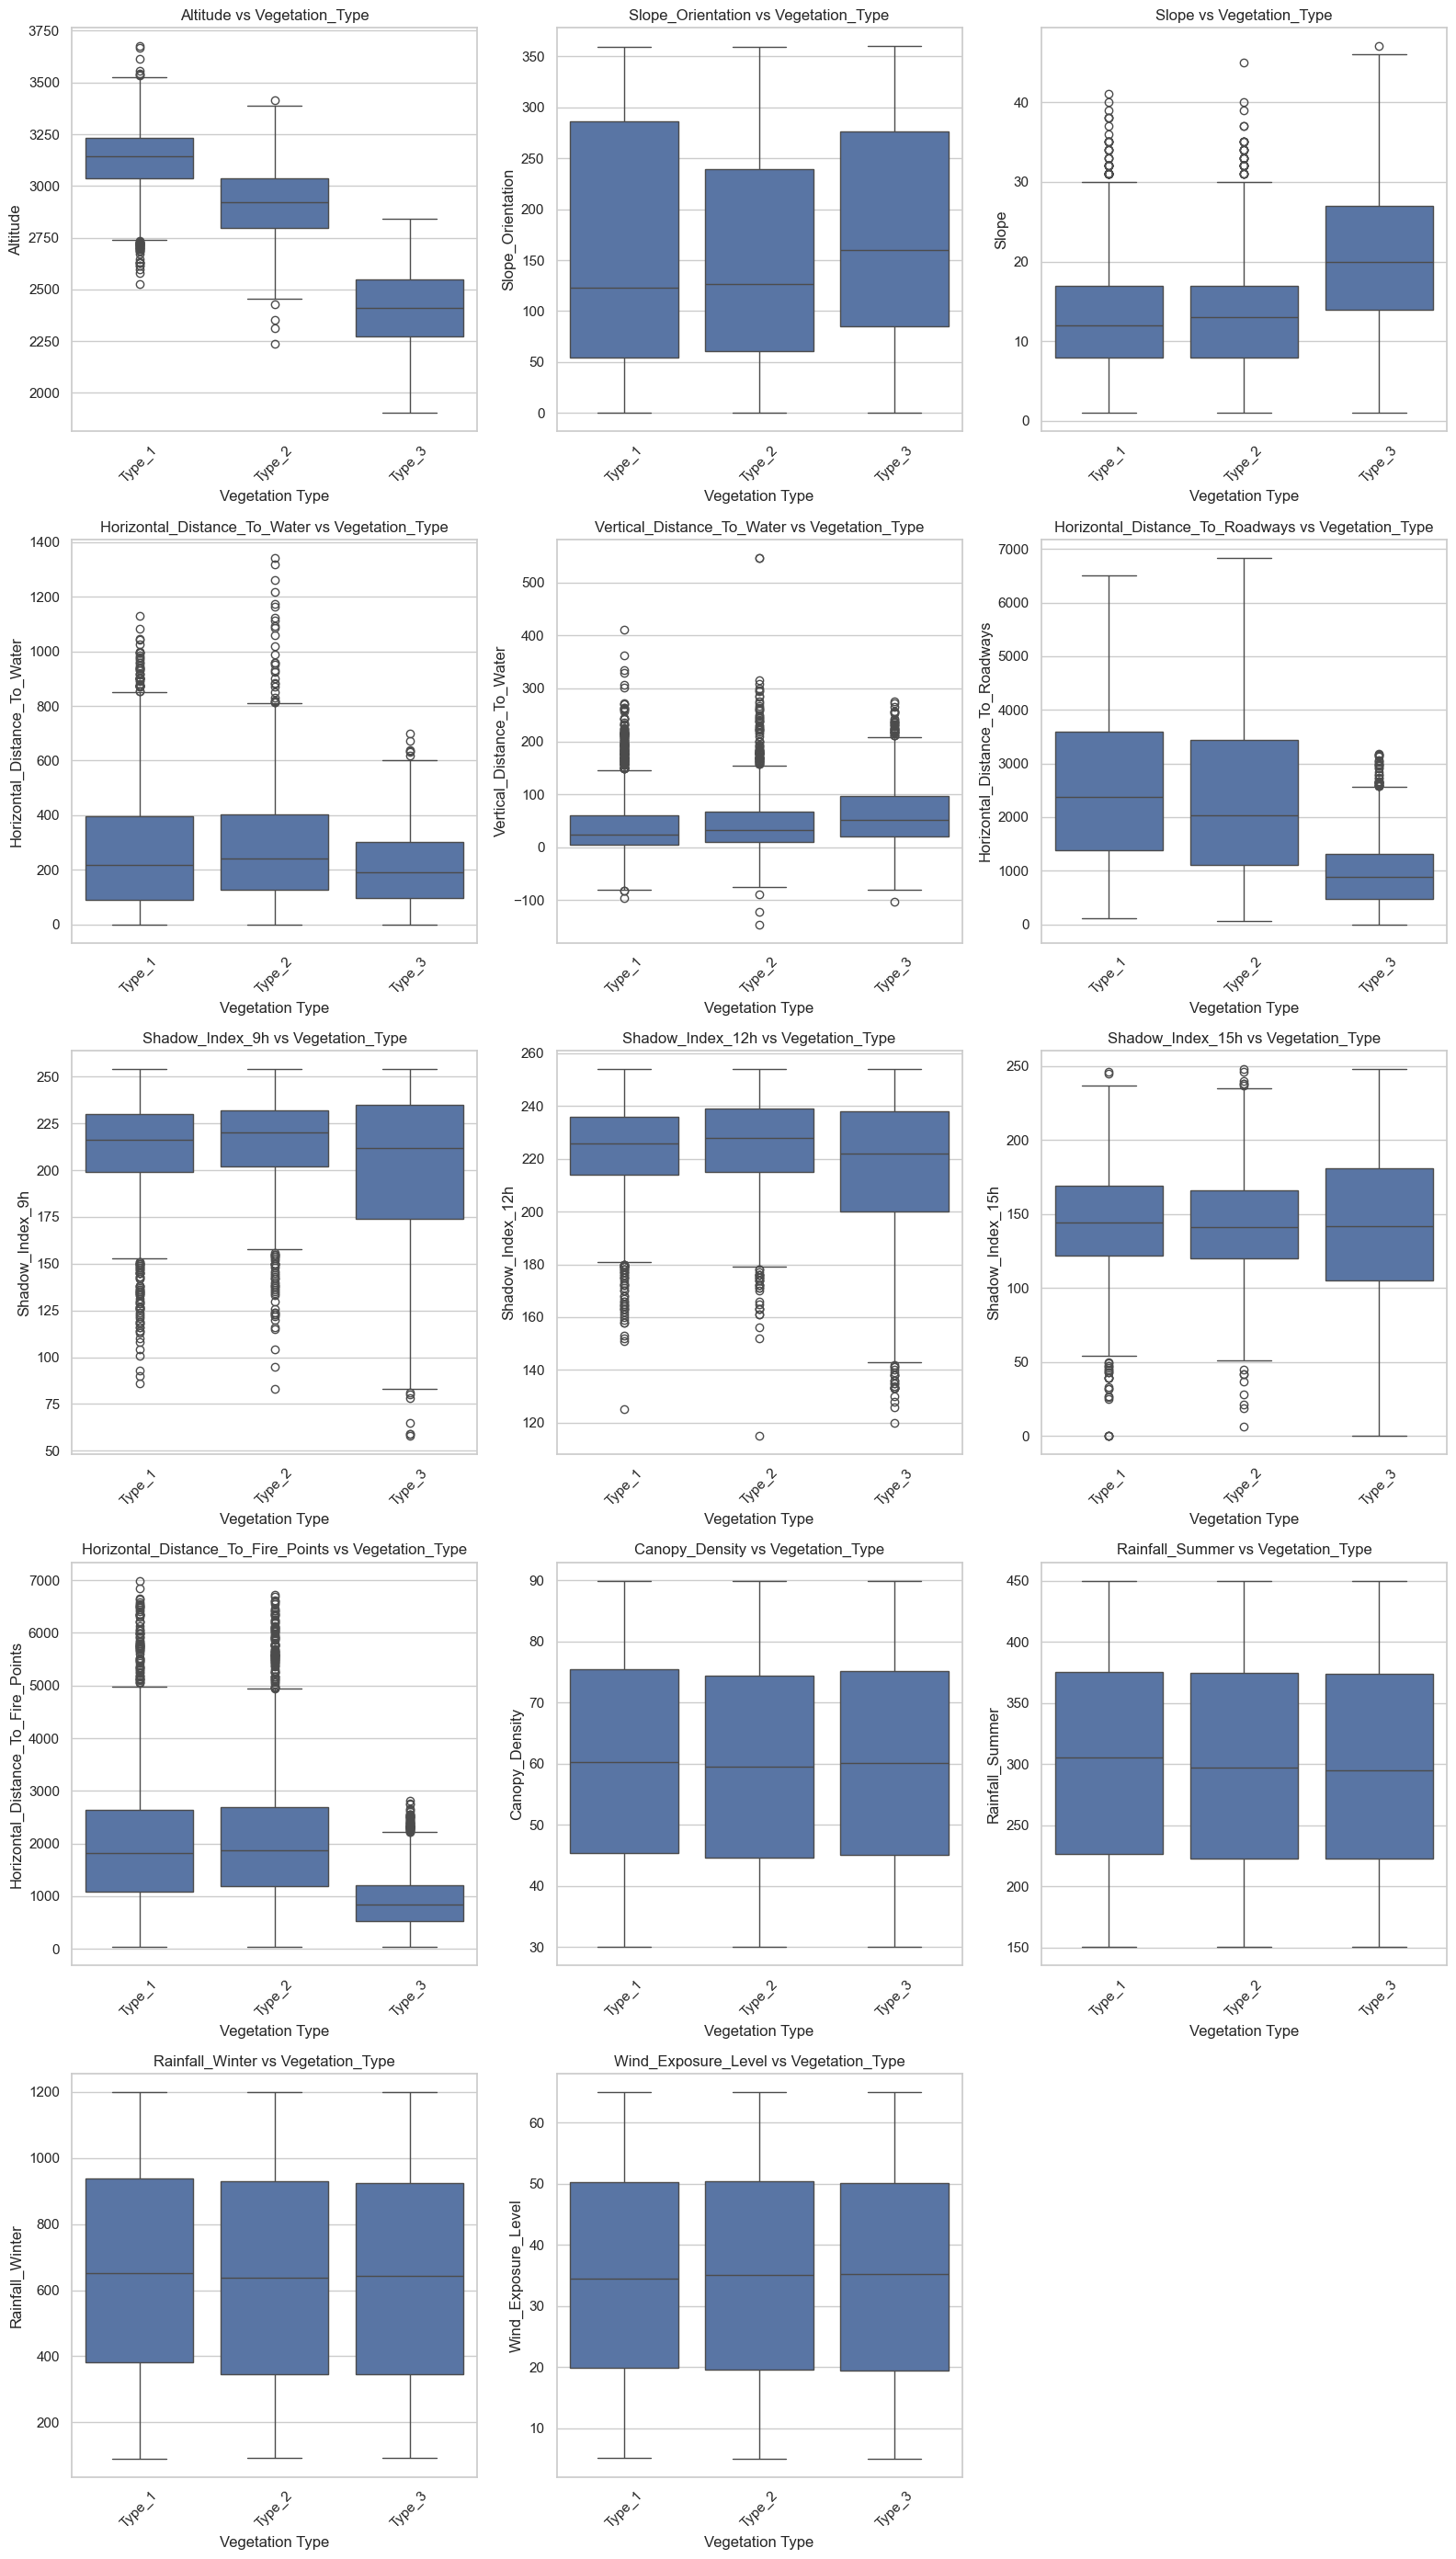

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns in the dataset
#numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Id', 'Vegetation_type']).columns

# Create subplots for each numerical column vs the label (Vegetation_Type)
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(16, len(numerical_columns)*2))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each numerical column and create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x='Vegetation_Type', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Vegetation_Type')
    axes[i].set_xlabel('Vegetation Type')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

From these violinplots and boxplots, some general observations regarding the classification problem can be made.

**Altitude**: The vegetation types appear to be well-separated by altitude. Type_1 is at a higher altitude, while Type_3 is at a lower altitude, with Type_2 in between. This suggests altitude may be a good feature for distinguishing between the types.

**Slope_Orientation**: All three types show overlap in terms of slope orientation, so it doesn't seem to differentiate vegetation types strongly.

**Slope**: There is no significant distinction between the vegetation types based on slope alone, as all seem to occupy similar ranges.

**Horizontal and Vertical Distance to Water**: These variables show some degree of separation, especially for Type_3, which tends to have smaller horizontal distances to water. Type_1 and Type_2 overlap more but still show some separation.

**Shadow Index (9h, 12h, 15h)**: There’s a fair amount of overlap in the shadow indices among the vegetation types, meaning these variables may not be significant in distinguishing between them.

**Horizontal Distance to Roadways**: This feature appears to be quite distinct for Type_3, which has a smaller range and distances from roadways compared to Type_2 and Type_3.

**Horizontal Distance to Fire Points**: This variable has some separation between vegetation types, with Type_3 having much lower distances to fire points than Type_1 and Type_2, which have a wider distribution.

**Canopy Density**: All vegetation types appear to have similar canopy densities, making it difficult to differentiate between them based on this feature.

**Rainfall (Summer and Winter)**: The rainfall in both seasons seems to be very similar across vegetation types, showing little to no variation or overlap.

**Wind Exposure Level**: There is minimal distinction among the vegetation types based on wind exposure, as all three distributions seem similar.

**Key Insights**:
Altitude and Horizontal Distance to Roadways/Fire Points appear to be strong variables for separating vegetation types. Some features, like Slope Orientation, Shadow Indices, and Canopy Density, show a lot of overlap, suggesting they might not be as important in classification.
Horizontal Distance to Water also provides some separability for Type_3, which might help in classification.  

To gain more insights in the correlation between the numerical features, a heatmap is created.

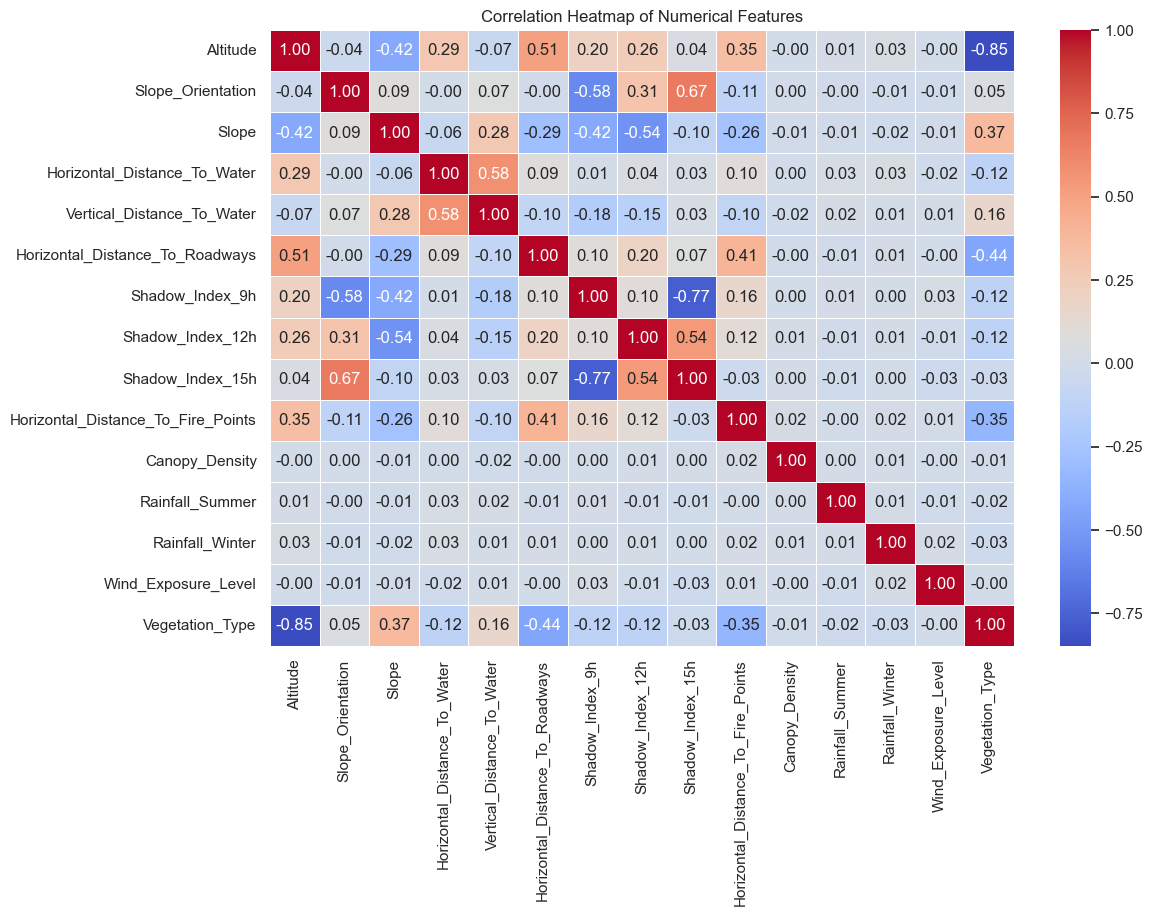

In [200]:
# Use factorize to define the categorical target variable into classes
df['Vegetation_Type'] = df.Vegetation_Type.factorize()[0]

# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope', 
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water', 
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 
    'Shadow_Index_12h', 'Shadow_Index_15h', 
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level',
    'Vegetation_Type'  
]

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Some observations can be made from this Correlation Heatmap.

**Altitude**: Strong negative correlation with Vegetation_Type (-0.85), showing altitude plays a major role in distinguishing vegetation types.

**Horizontal_Distance_To_Roadway**s: Moderate negative correlation (-0.44), indicating distance from roadways helps differentiate vegetation types.

**Slope**: Positive correlation (0.37), suggesting steeper slopes are more common in certain vegetation types.

**Horizontal_Distance_To_Fire_Points**: Moderate negative correlation (-0.35), showing vegetation type is influenced by distance from fire points.

**Shadow Indices**: Little correlation with Vegetation_Type, implying minimal impact on vegetation classification.  

Some Bivariate analysis can be done on the categorical variables as well. Using stacked barcharts the distribution of the categorical variables per vegetation type can be visualized. In the graphs, the values of Vegetation_Type 0, 1 and 2 correspond to respectively Type_1, Type_2 and Type_3. As can be seen, the distribution of the *Vegetation_Type* differs highly per category of the *Soil_Type* and *Wilderness_Area*. For example, Wilderness Area 4 almost always has Vegetation Type 3. This indicates that both *Soil_Type* and *Wilderness_Area* can be relevant features in the classification problem.

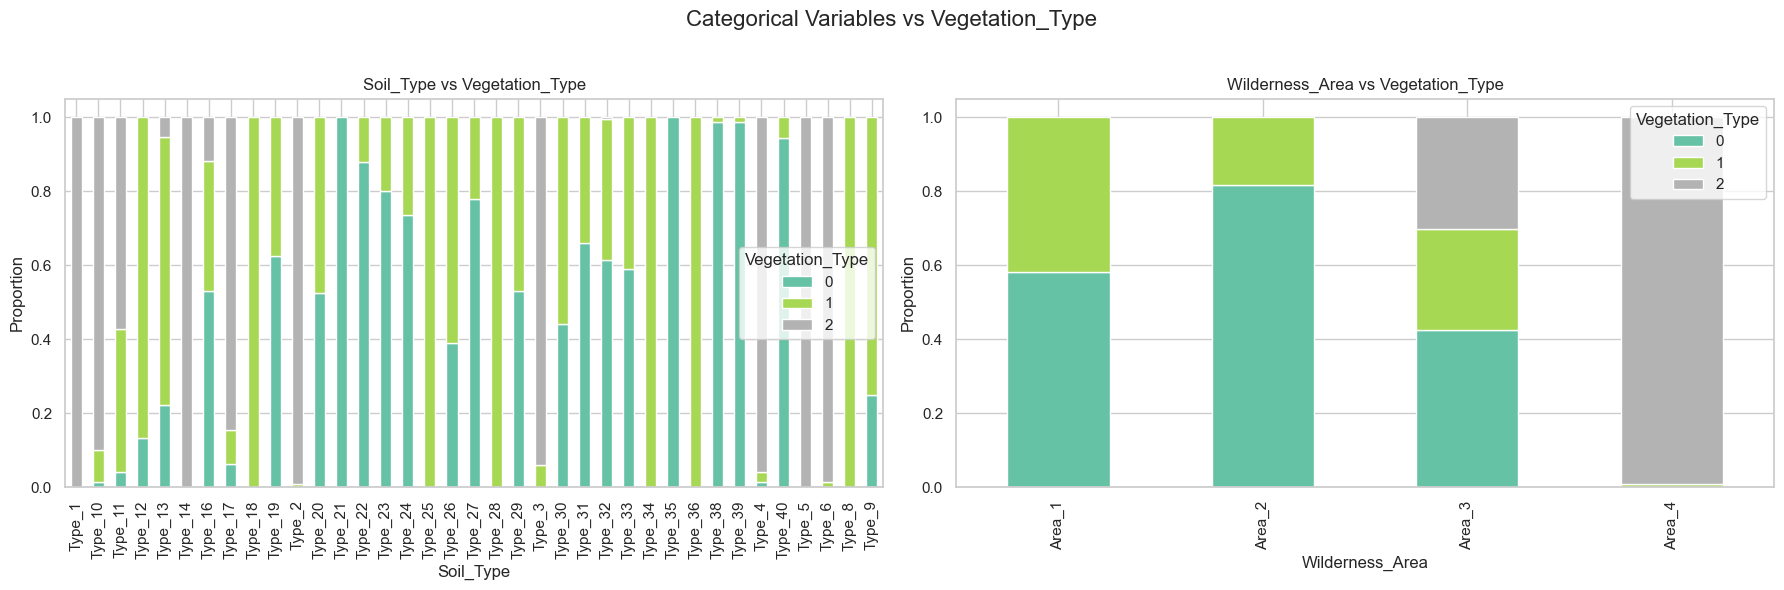

In [201]:
# List the categorical column names
categorical_columns = [
    'Soil_Type', 'Wilderness_Area']

# Set up subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(18, 6))
fig.suptitle('Categorical Variables vs Vegetation_Type', fontsize=16)

# Plot stacked bar charts for each categorical feature
for i, col in enumerate(categorical_columns):
    # Create a cross-tabulation of 'Vegetation_Type' against the categorical variable
    crosstab = pd.crosstab(df[col], df['Vegetation_Type'], normalize='index')
    
    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f'{col} vs Vegetation_Type')
    axes[i].set_ylabel('Proportion')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Summarized**:  
From this Univariate and Bivariate analysis some information can be extracted before applying any Machine Learning model. The features that are very relevant in the classification problem of the vegetation types are the altitude, slope, distances to roadways/fire points, soil type and wilderness area. On the other hand, the shadow indices seem to be of little importance in applying Machine Learning models.

### Chi-Squared Test
To show that the categorical variables in the dataset (i.e., *Soil_Type* and *Wilderness_Area*)  are significant, and we should include them into the model and transform them into dummies, a Chi-Squared test is used. The null-hypothesis of this test states that the categorical variables are not significant. After doing the Chi-Squared test, the p-value will determine whether to reject the null-hypothesis or not. As can be seen in the following code output, for both categorical variables the p-value is < 0.05 indicating that the null-hypothesis should be rejected and both categorical variables are significant.

In [202]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each categorical feature against the target Vegetation_Type
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Vegetation_Type'])  # Contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Chi-Square test
    
    print(f'Chi-Square Test for {col}:')
    print(f'Chi-Square statistic = {chi2}')
    print(f'P-Value = {p}')
    print(f'Degrees of Freedom = {dof}')
    print('-' * 50)
    

Chi-Square Test for Soil_Type:
Chi-Square statistic = 5569.050003992086
P-Value = 0.0
Degrees of Freedom = 72
--------------------------------------------------
Chi-Square Test for Wilderness_Area:
Chi-Square statistic = 3097.3323988488182
P-Value = 0.0
Degrees of Freedom = 6
--------------------------------------------------


## Machine Learning Methods 

### Data Preprocessing
Before Machine Learning models can be applied to the data, the data first needs some preprocessing. First of all, as most Machine Learning models can only handle numerical data, the categorical variables should be transformed into numerical variables. Several methods exist for this, but since our categorical data has no order, the most suitable method is OneHotEncoding. OneHotEncoding creates a new binary column for every class in the categorical columns. OneHotEncoding can be done fast using the built-in pandas function *get_dummies()*.  

In [203]:
df = pd.get_dummies(df, columns=['Soil_Type', 'Wilderness_Area'])
df.head()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,...,Soil_Type_Type_4,Soil_Type_Type_40,Soil_Type_Type_5,Soil_Type_Type_6,Soil_Type_Type_8,Soil_Type_Type_9,Wilderness_Area_Area_1,Wilderness_Area_Area_2,Wilderness_Area_Area_3,Wilderness_Area_Area_4
0,41,2699,347,3,0,0,2096,213,234,159,...,False,False,False,False,False,False,True,False,False,False
1,52,2739,323,25,85,43,3118,149,205,192,...,False,False,False,False,False,False,True,False,False,False
2,53,2696,72,2,30,0,3271,222,234,149,...,False,False,False,False,False,False,True,False,False,False
3,56,2722,315,24,30,19,3216,148,212,200,...,False,False,False,False,False,False,True,False,False,False
4,68,2919,13,13,90,6,5321,207,214,142,...,False,False,False,False,False,False,True,False,False,False


Moreover, another data preprocessing step is splitting the features and target variables. Another important data preprocessing is data scaling. Scaling must happen to make sure that no features become more dominant only because they are larger in magnitude. Several methods exist for data scaling such as MinMax Scaling and Standardization. Since the features have different distributions, Standardization is used for scaling using the StandardScaler(). To avoid data leakage, scaling will be done whenever the data is split into a training and test set.

In [204]:
# Split into features (X) and target (y)
X = df.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables, drop Id and the target variable
y = df['Vegetation_Type']  # target variable


In [205]:
from sklearn.model_selection import train_test_split

def split_and_scale(X, y, test_size = 0.2, random_state = 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)       

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    return X_train_scaled, X_test_scaled, y_train, y_test


### Resampling Techniques
In this section, we apply various resampling methods to assess their effectiveness on our dataset. The primary goal is to identify the most suitable technique for our specific data characteristics. The resampling methods that will be tasted are holdout sampling, K-Fold cross-validation, Leave-One-Out-Cross-Validation (LOOCV) and bootstrap sampling. Data scaling will be applied separately for each resampling technique to avoid data leakage.

To facilitate a comprehensive analysis, we initially utilize all resampling methods without feature elimination (i.e., the full dataset is used). This approach allows us to observe the impact of each resampling technique on the model's performance metrics, enabling us to make informed decisions regarding feature selection in subsequent analyses.

In [206]:
# Import the Machine Learning methods, resampling methods and evaluation metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.calibration import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

# Write a function to efficiently plot the ROC curve for a trained model
def plot_roc_curve(model, X_train, X_test, y_train, y_test, n_classes):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    
    # Use OneVsRestClassifier for multi-class ROC
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting the ROC curves
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    
    for i, color in enumerate(colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve (area = {0:0.2f}) for class {1}'.format(roc_auc[i], i))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

# Write a function to efficiently plot the confusion matrix for a trained model
def evaluate_confusion_matrix(y_test, y_pred, model_classes=['VT1', 'VT2', 'VT3']):
    cm = confusion_matrix(y_test, y_pred)
    
    # Display the confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Visualize the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Holdout resampling
def holdout(model, X, y, test_size=0.2, random_state=42):
    X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale(X, y, test_size=test_size, random_state=random_state)       

    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train) 
    # X_test_scaled = scaler.transform(X_test) 

    model.fit(X_train_scaled, y_train) 
    y_pred = model.predict(X_test_scaled)  
    f1 = f1_score(y_test, y_pred, average='weighted')  
    
    print(f"Holdout F1 Score: {f1:.6f}")
    
    # Call confusion matrix evaluation
    model_classes = ['VT1', 'VT2', 'VT3']  
    evaluate_confusion_matrix(y_test, y_pred, model_classes)  
    
    # Return the predictions and test labels for confusion matrix evaluation
    return X_train_scaled, X_test_scaled, y_train, y_test, y_pred, f1

# K-Fold cross-validation
def k_fold_cv(model, X, y, k=5, random_state=42):
    # Create a pipeline that first scales the data, then applies the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Scaling
        ('model', model)               # Step 2: Model
    ])
    
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)

    cv_results = cross_val_score(pipeline, X, y, cv=kf, scoring='f1_weighted')  
    
    print(f"Cross-Validation F1 Scores: {cv_results}")
    mean_f1 = cv_results.mean()
    print(f"Mean F1 Score: {mean_f1:.6f}")
    
    return mean_f1

# LOOCV (Leave-One-Out Cross-Validation)
def loocv(model, X, y):
    # Create a pipeline that scales X and then applies the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Scaling
        ('model', model)               # Step 2: Model
    ])
    
    loo = LeaveOneOut()
    cv_results = cross_val_score(model, X, y, cv=loo, scoring='f1_weighted') 
    
    mean_f1 = cv_results.mean()
    print(f"LOOCV Mean F1 Score: {mean_f1:.6f}")
    return mean_f1

# Bootstrap resampling
def bootstrap(model, X, y, n_iterations=10):
    n_samples = X.shape[0]
    f1_scores = []

    for i in range(n_iterations):
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        X_train, y_train = X.iloc[indices], y.iloc[indices]
        out_of_bag = list(set(range(n_samples)) - set(indices))
        X_test, y_test = X.iloc[out_of_bag], y.iloc[out_of_bag]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train) 
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        
        if len(out_of_bag) > 0:  # Ensure there are out-of-bag samples
            y_pred = model.predict(X_test_scaled)
            f1 = f1_score(y_test, y_pred, average='weighted')  
            f1_scores.append(f1)
    
    mean_f1 = np.mean(f1_scores)
    print(f"Bootstrap Mean F1 Score: {mean_f1:.6f}")
    return f1_scores

### Methods Application with complete dataset  
After coding all resampling methods, these resampling methods can be used on the Machine Learning methods to test their effectiveness in this classification problem. Three types of Machine Learning methods are applied, namely Logistic Regression (LR), Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). All resampling methods will be tested on these Machine Learning (ML) methods. To evaluate which method is most suitable for this classification problem, evaluation metrics are used. The evaluation metrics that are most suitable to use in a classification problem are accuracy, precision, recall, F1-score, support and a ROC curve. Since our dataset is imbalanced, accuracy is not a good evaluation metric. The evaluation metrics that will be used for comparing the performance of the ML models are the F1-score and a ROC curve. The F1-score is the mean of the precision and recall which are important metric in classification problems. The F1-score is very useful for this classification problem since the dataset is imbalanced. For the best model, the confusion matrix will also be shown. The cell below runs all resampling methods for all three ML models.


Evaluating Logistic Regression...
Holdout F1 Score: 0.847900
Confusion Matrix:
[[353  87   3]
 [ 53 201  13]
 [  0   2 325]]


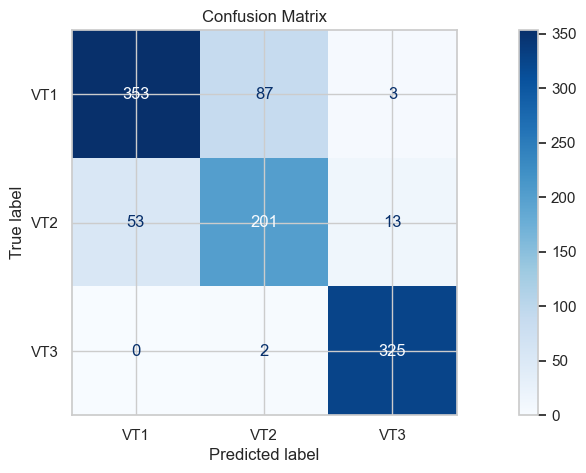

K-fold 5
Cross-Validation F1 Scores: [0.84790047 0.81173224 0.86040712 0.81575342 0.82537124]
Mean F1 Score: 0.832233
K-fold 10
Cross-Validation F1 Scores: [0.84145833 0.84351695 0.8005734  0.80630691 0.85320013 0.87131912
 0.81614405 0.81986329 0.82983227 0.82043761]
Mean F1 Score: 0.830265


KeyboardInterrupt: 

In [207]:
# Create a list to track performance of all the models in the data analysis
best_models = []

def evaluate_models(X, y):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight="balanced"),
        'LDA': LinearDiscriminantAnalysis(),
        'QDA': QuadraticDiscriminantAnalysis()
    }

    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...")

        # Holdout
        # X_train, X_test, y_train, y_test, y_pred, f1  = holdout(model, X, y)

        holdout(model, X, y)        
        # Perform K-Fold Cross-Validation (5-fold)
        print("K-fold 5")
        mean_f1_cv5 = k_fold_cv(model, X, y, k=5)  # Perform 5-fold cross-validation

        # Perform K-Fold Cross-Validation (10-fold)
        print("K-fold 10")
        mean_f1_cv10 = k_fold_cv(model, X, y, k=10)  # Perform 10-fold cross-validation

        best_models.append({model_name + "_5-Fold" : mean_f1_cv5})
        best_models.append({model_name + "_10-Fold" : mean_f1_cv10})

        # LOOCV
        #loocv_accuracy = loocv(model, X_scaled, y) # LOOCV is very computationally expensive with the current dataset size

        # Bootstrap Resampling
        bootstrap_accuracies = bootstrap(model, X, y, n_iterations=10)

# Now you can call the function to evaluate your models
evaluate_models(X, y)

Evaluating these F1-scores, some conclusions can be made about the resampling techniques and ML models. It can be noted that for all three models, holdout resampling gives the best results. For the models using the holdout resampling methods, the confusion matrix is given. The number of correctly (and wrongly) classifications is given in the confusion matrix. Moreover, the LR model outperforms the other two models with an F1-score of 0.848 but the LDA model also performs really good with an F1-score of 0.836. However, the QDA performs worst with an F1-score of 0.623. This can also be concluded from the confusion matrix. The bad performance of the QDA can be caused by multiple reasons. For example, maybe the relationships cannot be caught by the Quadratic nature of the QDA, or it is due to the imbalanced dataset and the classes are not well presented. 

# ANOVA Test
 
To possibly increase the perforamnce of the ML models, it is interesting to train the models with a modified dataset. The features that are irrelevant for identifying the target variable can be left out. To determine which features could potentially be dropped, an ANOVA test is used. This is a common method for this since ANOVA can help determine if there are statistically significant differences between the features. The features with a p-value < 0.05 are irrelevant and can be dropped. 

The following features will be dropped to possibly improve the model performance:
- *Rainfall_Winter*
- *Shadow_Index_15h*
- *Rainfall_Summer*
- *Canopy_Density*
- *Wind_Exposure_Level*

Moreover, these features also show a low correlation to the target variable in the bivariate analysis.

In [ ]:
from scipy import stats

anova_results = {}

numerical_columns.remove('Vegetation_Type')  

for col in numerical_columns:
    groups = [df[col][df['Vegetation_Type'] == v] for v in df['Vegetation_Type'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = {'F-Value': f_val, 'P-Value': p_val}

anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values(by='P-Value', ascending=True)
print(anova_df)

### Methods Application with modified dataset
Now, the irrelevant features according to the ANOVA test and also correlation heathmap are dropped and all resampling methods are applied to the three ML models again.

In [ ]:
# Here we can select the best features based on the bivariate analysis and ANOVA test
X_best = df.drop(['Id', 'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level', 'Canopy_Density', 'Shadow_Index_15h', 'Vegetation_Type'], axis=1)

evaluate_models(X_best, y)

As can be noted, the LR model is still the best model among the three. Again, the LDA is very good again but the QDA still performs the worst. The holdout resampling method gives the best results for all three models, and due to the irrelevant feature deletion, the performance of every model increased. Again, for the holdout method the confusion matrix is shown for every model. Comparing the values in the confusion matrices to the confusion matrices of the model with the complete data, classification improvements can be recognized. For the holdout method, the F1-score for the LR and LDA increased, respectively (0.850 vs 0.848) and (0.839 vs 0.836). The QDA performs worse compared to the model which used the full dataset (0.618 vs 0.623). This could be explained by the fact that because of dropping features, relationships between the features cannot be caught by the QDA model.

#### ROC Curves 
The ROC curves below show the performance of the model with the complete dataset, and the model with the modified dataset. The ROC curve is a graph which can be used to evaluate the performance of a classification problem by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR), and useful for imbalanced datasets. A perfect model reaches the top left corner and a random classifier would follow the diagonal line (Area Under Curve (AUC) = 1).

For both models, the ROC curves look similar. If you look precisely, the ROC curve for the model with modified data heads a bit more towards the upper left corner. From the curves it can also be concluded that the Vegetation Type 2 (i.e., class 1) is the hardest to classify since the curve is the most towards the diagonal. Vegetation Type 3 (i.e., class 2) has the best performance. performance.

In [ ]:
# Compare LR model with complete dataset and model with modified dataset
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_modified = LogisticRegression()
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(X_best, y, test_size=0.2, random_state=42)

# Create a figure
plt.figure(figsize=(12, 5))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.title('ROC Curve for Multi-Class Classification Model with complete data')
plot_roc_curve(model, X_train, X_test, y_train, y_test, n_classes=3)

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.title('ROC Curve for Multi-Class Classification Model with modified data')
plot_roc_curve(model_modified, X_train_modified, X_test_modified, y_train_modified, y_test_modified, n_classes=3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Conclusion**  
In conclusion, the best resampling method for this classification problem is holdout resampling. Moreover, the Logistic Regression model performs the best in terms of F1-score compared to the LDA and QDA model. Furthermore, manually removing irrelevant features can also improve model performance.

## Feature Selection

As just evaluated, removing irrelevant features from the model can improve the model performance. This can be done manually as in the previous step. However, there also methods that do this automatically. This is called *Regularization*. Regularization introduces extra penalty terms that influence the coefficients of features. The coefficient of a feature can then decrease until 0 (i.e., it is not used in the model), which also decreases model complexity. Moreover, this prevents the model for overfitting.  

- Overfitting: The model performs well on the training set but not so well on unseen (test) data.
- Underfitting: Neither performs well on the train set nor on the test set.

**Regularization** is thus implemented to avoid overfitting of the data, especially when there is a large variance between train and test set
performances. There are different methods of reducing the model complexity and preventing overfitting in linear models which are *Ridge*, *Lasso* and
*Elastic Net* Regression Models.

In the evaluation and understanding of *Ridge* and *Lasso* Regression, visualizations can be very helpful. The following cell of code will contain functions to efficiently make these visualizations. Here a short explanation on the visualization is given.


### Alpha-Weight plot

- X-axis: 
    - This is the regularization parameter for the Ridge classifier.
    - Smaller alpha values mean less regularization 
    - Larger alpha values mean more regularization, which shrinks the coefficients towards zero.
- Y-axis
    - Each line corresponds to the coefficient value (weight) of a feature in the model.

#### Plot behaviour
- Small alpha values
    - Coefficients are large (the model tries to fit the training data closely).
- As alpha increases
    - Coefficients shrink towards zero, indicating regularization
    - If coefficient shrink to exactly 0 that mean feature is ignored in model
- Very high alpha
    - All coefficients tend towards zero, and the model behaves like a simple mean-based model 

#### Key insights
- Lower alpha indicate more complex model but potentially overfitting
- Higher alpha stabilize coefficients or shrink to zero, indicating simpler/more stable model but may underfit data
- If coefficients drop to zero early, that suggest that feature **may not contribute to much** in model

In [148]:
def plot_regression_model(alphas, coefs):
    """ Plot the coefficients of the model for each alpha value. """
    
    coefs = np.array(coefs)  # Ensure coefs is a numpy array
    num_alphas = len(alphas)  # Number of different alpha values
    num_classes, num_features = coefs.shape[1], coefs.shape[2]  # Extract the shape: (100, 3, 55)
    
    plt.figure(figsize=(10, 6))
    
    # Loop over each feature to plot its coefficient across alphas
    for feature_idx in range(num_features):
        # Plot the coefficients for this feature across all alpha values
        plt.plot(alphas, coefs[:, 0, feature_idx], label=f'Feature {feature_idx+1}') 
        
    plt.xscale('log')  # Log scale for alpha values
    plt.xlabel('Alpha (Log Scale)')
    plt.ylabel('Coefficient Value')
    plt.title('Coefficient Paths for Different Alpha Values')
    plt.grid(True)
    plt.show()

### Bias-Variance Trade-off // HOW TO MAKE THIS FOR A CLASSIFIER

The graph illustrates the bias-variance trade-off in regularized regression models. As the regularization parameter increases:

Bias increases: The model becomes simpler, potentially underfitting the data and leading to higher systematic errors.
Variance decreases: The model becomes more robust to noise in the training data, reducing overfitting.
The optimal value of the regularization parameter balances this trade-off, minimizing the overall prediction error. The minimum MSE point on the graph highlights this optimal value.

#### Key Takeaways

Regularization Strength: A higher regularization parameter imposes stronger constraints on the model, reducing its complexity.
Bias-Variance Trade-off: There is an inherent trade-off between bias and variance. Choosing the right regularization parameter is crucial to find the sweet spot.
Model Generalization: The goal is to find a model that generalizes well to unseen data, minimizing both bias and variance.

Difference between Ridge and Lasso with Elastic Net is that Test MSE increase faster but also faster remain stable.

In [149]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classification_metrics(alphas, precision, f1):
    """ Plot the classification metrics across alpha values. """
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.plot(alphas, precision, label='Precision', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha (Log Scale)')
    plt.ylabel('Precision')
    plt.title('Precision vs Alpha')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(alphas, f1, label='F1 Score', marker='o')
    plt.xscale('log')
    plt.xlabel('Alpha (Log Scale)')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Alpha')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


**Ridge Regression**  
Is a variation of linear regression, specifically designed to address multicollinearity in the dataset. In linear regression, the goal is to find the best-fitting hyperplane that minimizes the sum of squared differences between the
observed and predicted values, but when there is high correlation between variables, LR model may be moderately or highly correlated with another.
Multicollinearity exists when 2 or more predictors in regression model are correlated with another one. 

*Ridge Regression* use *L2 penalty*, that penalize the large coefficients to prevent overfitting.

The tuning parameter λ serves to control the relative impact, when λ = 0 than penalty has no effect. As λ grows to infitite the penalty grows which lead to shrinking coeffiecients to zero. Cross-Validation is used for selecting a good value for λ as it's very important.

**Lasso Regression**  
Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses *L1* regularization to prevent overfitting by penalizing the absolute size of regression coefficients.
- It adds a penalty equivalent to the sum of the absolute values of coefficients to the loss function
- Lasso shrinks some coefficients to exactly zero, effectively selecting a subset of features. This makes it a good choice when dealing with high-dimensional data or when some features are irrelevant
- By shrinking coefficients, Lasso reduces variance at the cost of introducing some bias, helping to improve generalization

**Elastic Net Regression**  
Elastic Net combines the *L1* and *L2* penalty of Ridge and Lasso regression. 
- An extra hyperparameter is introduced which balances the combination of the *L1* and *L2* penalties
- This is a very efficient method in high dimension datasets

Since Ridge, Lasso and ElasticNet are linear regression methods, it cannot be immediately applied to our classification problem. It can be applied to a classification problem when using a LogisticRegression function and introducing the penalty term. Since our problem is a multi-class problem (i.e., there are more than two classes), it is modelled as a one-vs-rest logistic regression where the model predicts the class probabilities for each class. First, using the penalty terms for Ridge, Lasso and ElasticNet, the coefficient behaviour is investigated and plotted for different values of alpha.  

Then, cross-validation (k=5 since that yielded the best results earlier in the analysis) is used to find the best alpha values. Since this is a one-vs-rest problem, a separate binary classifier is trained for each target class. Then using cross-validation, the best alpha value for each regularization method is found. Moreover, for the ElasticNet regularization, the best value for the *l1_ratio* is found using cross-validation. The following set of values for the *l1_ratio* is considered: [0.1, 0.2 ..., 0.8, 0.9]. The best value for the *l1_ratio* is found to be 0.4 and will be used. The code for using cross-validation on the *l1_ratio* is commented out because it is computationally expensive.

In [150]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, f1_score, classification_report

def process_regularization_models(model_name, alphas, X_train, y_train, x_test, y_test, random_state=42):

    if model_name == 'Ridge':
        model = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', random_state=42)
    elif model_name == 'Lasso':
        model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', random_state=42)
    elif model_name == 'ElasticNet':
        model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.4, multi_class='ovr', random_state=42) 

    precision = []
    f1 = []
    coefs = []

    for a in alphas:
        model.set_params(C=1/a)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

        precision.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

        coefs.append(model.coef_)

    np.shape(coefs)
    plot_regression_model(alphas, coefs)      
 #   plot_bias_variance_tradeoff(alphas, squared_bias, variance, mse) 
    plot_classification_metrics(alphas, precision, f1)

def process_regularization_model_w_cross_validation(model_name, alphas, X_train, y_train, X_test, y_test, random_state=42):
    Cs = 1 / alphas  # Inverse of alpha to get C values for LogisticRegressionCV
    
    if model_name == 'Ridge':
        modelCV = LogisticRegressionCV(Cs=Cs, cv=5, penalty='l2', solver='liblinear', scoring='f1_weighted', random_state=42)
    elif model_name == 'Lasso':
        modelCV = LogisticRegressionCV(Cs=Cs, cv=5, penalty='l1', solver='liblinear', scoring='f1_weighted', random_state=42)
    elif model_name == 'ElasticNet':
        # Code for l1_ratio cross-validation
        # lst_l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        # modelCV = LogisticRegressionCV(Cs=Cs, cv=5, penalty='elasticnet', solver='saga', l1_ratios=lst_l1_ratios, scoring='f1_weighted', random_state=42)
        modelCV = LogisticRegressionCV(Cs=Cs, cv=5, penalty='elasticnet', solver='saga', l1_ratios=[0.4], scoring='f1_weighted', random_state=42)

    modelCV.fit(X_train, y_train)
    
    best_C_value = modelCV.C_[0]
    best_alpha_value = 1 / best_C_value

    # Code for l1_ratio cross-validation
    # if model_name == 'ElasticNet':
    #     best_l1_ratio = modelCV.l1_ratio_[0]
    #     print(f"Best l1 ratio value after cross validation: {best_l1_ratio}")

    print(f"Best alpha after cross validation: {best_alpha_value}")
    
    y_pred = modelCV.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    best_models.append({model_name: f1})

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print the best model coefficients
    feature_names = X.columns

    class_coefficients = modelCV.coef_
    avg_coefficients = np.mean(np.abs(class_coefficients), axis=0) # Aggregate coefficients

    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Avg_Coefficient': avg_coefficients
    })
    coef_df = coef_df.reindex(coef_df.Avg_Coefficient.abs().sort_values(ascending=False).index)
    
    print(coef_df)
    return coef_df

In [151]:
X = X.apply(lambda col: col.astype('float64') if col.dtype in ['int64', 'float32', 'float64'] else col)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scaler = StandardScaler() 
# X_train = scaler.fit_transform(X_train) 
# X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = split_and_scale(X, y, test_size=0.3, random_state=42)


In [152]:
# Create a range of alphas to use in the regularization methods
alphas = 10**np.linspace(10,-2,100)*0.5 

In [ ]:
def evaluate_regularization_models(X_train, X_test, y_train, y_test):

    results = {}
    model_names = ['ElasticNet'] #['Ridge', 'Lasso', 'ElasticNet']

    for model_name in model_names:
        print(f"\nEvaluating {model_name} model...")
        process_regularization_models(model_name, alphas, X_train, y_train, X_test, y_test)
        results[model_name] = process_regularization_model_w_cross_validation(
            model_name, alphas, X_train, y_train, X_test, y_test
        )

    return results
    
regularization_results = evaluate_regularization_models(X_train, X_test, y_train, y_test)

**Conclusion regularization**  
As can be seen, the best alpha value for the Lasso classifier are higher then the best alpha values for the Ridge classifier. This indicates a higher penalty term in the Lasso classifier and more coefficients shrinking towards zero, which is in line with the theory and can be seen as more coefficients tend towards zero. Moreover, the performance of the models can be evaluated using the classification performance measures precision and f1 score. The Ridge, Lasso and ElasticNet classifier all perform well with an f1 score of respectively 0.82, 0.82 and 0.83, indicating that the ElasticNet classifier performs the best.  

Furthermore, it can be noticed that *Vegetation_Type* 2 (i..e, class 1) is hardest to classify as the f1 and precision score for this class are significantly lower than the f1 and precision scores of the other classes. This holds for all models. Moreover, *Vegetation_Type* 3 (i.e., class 2) is best predicted by the models.

### Can Classification Models Perform Better with Fewer Features? 

In classification problems, using all available features does not always lead to the best model performance. Sometimes, certain features may be irrelevant, redundant, or noisy, potentially degrading the model's accuracy and interpretability. Feature selection—choosing a subset of the most relevant features—can improve classification performance by reducing overfitting, speeding up the training process, and simplifying the model. Therefore, it is crucial to explore whether a model can achieve better results by focusing on a few significant features instead of all available ones.

In [ ]:
for index, model in enumerate(best_models):
    if index == 0:
        print("Results of models with all features:")
    elif index == 6:
        print("\nResults of models with selected features:")
    elif index == 12:
        print("\nResults of regularization models:")
    
    for model_name, f1_score_result in model.items():
        print(f"{model_name}: F1 Score = {f1_score_result}")

In [ ]:
# Initialize variables to track the maximum F1 score and its corresponding model
max_f1_score = float('-inf')
best_model_name = None

model_names = []
f1_scores = []

for index, model in enumerate(best_models):
    for name, score in model.items():
        if 6 <= index < 12:
            prefix = "FS_"
        else:
            prefix = ""
        full_name = prefix + name
        model_names.append(full_name)
        f1_scores.append(score)

        # Check if the current model is one of Ridge, Lasso, or ElasticNet and track the max F1 score
        if name in ['Ridge', 'Lasso', 'ElasticNet'] and score > max_f1_score:
            max_f1_score = score
            best_model_name = full_name

# Find the overall highest F1 score's index for plotting
max_index = np.argmax(f1_scores)

# Highlight the bar corresponding to the highest F1 score
colors = ['skyblue' if i != max_index else 'orange' for i in range(len(f1_scores))]

plt.figure(figsize=(14, 8))
plt.barh(model_names, f1_scores, color=colors)
plt.xlabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



As can be concluded from the figure above, in the classification problem of identifying the *Vegetation_Type*, models with fewer features perform better than the model with all features. The model with the manual feature selection performs best. Of course, this is not a general conclusion and the performance of a model with less features as input highly depends on the feature selection. In this case, using the Chi-Squared test to remove features even (slightly) outperforms the classification models that used regularization. This could be explained by several reasons. For example, the regularization parameter alpha can introduce bias, or on the other side, the model with manual feature selection can be overfitted. The model then performs well on the current dataset but will have worse performance on another dataset. Moreover, the (lack of) correlation between features can be a reason why the regularization classifiers are outperformed.

In the remainder of the data analysis, the best features resulting from one of the regularization methods are used. Since the best regularization method is the best ElasticNet classifier, the features with the highest coefficients according to the ElasticNet classifier after cross-validation will be selected.

# Filtering the most relevant predictors
In this section, we refine the results from Part 4: Feature Selection by identifying the model with the best performance and narrowing down the 10-15 most relevant predictors for further analysis.

In [ ]:
# Get the best results based on model w highest f1 score
best_after_fs = pd.DataFrame(regularization_results[best_model_name])

# Filter the features to work only w ones that coefficient si greater tha 0.15
filtered_df = best_after_fs[best_after_fs['Avg_Coefficient'] > 0.15]
filtered_features = filtered_df['Feature'].tolist()
print(filtered_features)

# Create a new X DataFrame w mosst relevant predictors, show the columns/feature names
X_filtered = X[filtered_features]

# Split and scale the new data and use this values in next sections
x_train_fs, x_test_fs, y_train_fs, y_test_fs = split_and_scale(X_filtered, y)

print(f"x_train: {x_train_fs.shape[0]} rows, {x_train_fs.shape[1]} columns")
print(f"x_test: {x_test_fs.shape[0]} rows, {x_test_fs.shape[1]} columns")
print(f"y_train: {y_train_fs.shape[0]} rows")
print(f"y_test: {y_test_fs.shape[0]} rows")

## General Additive Method (GAM)

# Note: For the following tasks, you must use the most relevant predictors, 
based on the results obtained in Task 4 - Feature Selection. (should be done in cell above -> get the all rsults from FS methods and based on the f1 score select the best one and filter features which avg is > 0.15, we can test w different values which one will be best)

Now we will use a General Additive Method for a binary classification within our *Vegetation_Type* classification problem using a non-linear function. Using GAM, each feature's relationship with the target class is modeled separately, while other features are held constant. Since in the *Vegetation_Type* classification problem there are three possible classes in the target variable, we will build a model that allows to predict one of the target variable classes (one-vs-rest). To build and learn a non-linear function using GAM, the pyGAM library is used. Since the *Vegetation_Type* identification problem is a classification problem, a logistic GAM is used (similar as for applying the regularization regression models as classifiers).  

**Smoothing parameter**  
Moreover, the smoothing parameter lambda is analysed. This parameter can avoid over- and underfitting. Low values of lambda allow the model to fit data more closely (which can cause overfitting), while high values of lambda assures more smoother curves and thus penalizes flexibility to the data (which can cause underfitting). Using gridsearch, for every smoothing term in every one-vs-rest model, the value of lam is determined. Moreover, cross-alidation is used to prevent under- and overfitting. CV = 5 is set separately in this cross-validation since the default number of folds in GAM is 10. Since we are using 5 folds for all models, we do it here as well. As a result, for each one-vs-rest model, the value of lambda is the same for each smoothing term.

Furthermore, each fitted smoothing function is plotted for each feature to see the relationship between the feature and the target classes. The x-axis shows the value of the scaled feature while the y-axis show the log-odds. It can be interpreted as follows, the lower on the y-axis, the lower the probability belonging to the class for that feature value. For example, as can be seen from the plot of feature 1 (*Soil_Type_2*), the lower the value of feature 1, the higher the probability for class 0 and 1 (*Vegetation_Type* 1 and 2). Vice versa for feature 1, the lower the feature value, the lower the probability for class 2 (*Vegetation_Type* 3). 

In [ ]:
print(f'In total {len(filtered_features)} features are left for classifying the target variable in further data analysis')

In [ ]:
from pygam import LogisticGAM, s

# Create separate binary GAMs for each class (One-vs-Rest approach)
models = []

for i in range(len(y.unique())):
    y_binary = (y_train_fs == i).astype(int) # y_binary equals 1 when belonging to the class and 0 otherwise

    # Create smoothing terms (24 features are left in the dataset)
    terms = s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + \
            s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + \
            s(19) + s(20) + s(21) + s(22) + s(23)
  
    lam_values = np.logspace(-3, 3, len(terms)) # Create a search space for parameter lambda
    
    # Define and fit the GAM for this class
    gam = LogisticGAM(terms, lam=lam_values)  
    gam.cv = 5
    gam.gridsearch(x_train_fs, y_binary, lam=lam_values)

    # Print the best lambda value for each class
    print(f"Best lambda for class {i}: {gam.lam[0]}\n")
    
    models.append(gam)

preds = np.zeros((x_test_fs.shape[0], 3))  # To store probabilities for each class
for i, model in enumerate(models):
    preds[:, i] = model.predict_proba(x_test_fs)

# Get final predictions by taking the class with the highest probability
final_preds = np.argmax(preds, axis=1)
f1_GAM = f1_score(y_test_fs, final_preds, average='weighted')
print(f'F1 score: {f1_GAM}')
best_models.append({'GAM': f1_GAM})

# Evaluate
print(f"\nClassification Report:")
print(classification_report(y_test_fs, final_preds))

# Create a 6x4 grid for subplots (6 rows, 4 columns for 24 features)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through the features (terms) and plot for each feature
for j, term in enumerate(models[0].terms):  
    if term.isintercept: continue  # Skip intercept terms
    
    ax = axes[j]
    
    # Plot the smoothing function for each class
    for i, gam in enumerate(models):
        XX = gam.generate_X_grid(term=j)  # Generate a grid for the feature
        y_pred = gam.partial_dependence(term=j, X=XX)  
        ax.plot(XX[:, term.feature], y_pred, label=f'Class {i}')  
    
    ax.set_title(f'{filtered_features[j]}')  
    ax.set_xlabel(f'Feature {j}')
    ax.set_ylabel('Partial Dependence')  
    ax.legend(fontsize=8)  
    ax.grid(True)  

plt.tight_layout() 
plt.show() 

The f1 score of the GAM model is 0.845. This is the highest f1 score so far, indicating that the GAM classifier is the best model so far for classifying the *Vegetation_Type*. Moreover, as earlier mentioned, the relationship between each feature and the target classes can be seen in the plots. An example is already given on feature 1 (*Soil_Type_2*), but for all features there exist relationships with at least one target class. *Soil_Type_5*  is also an interesting example. There seems to be no, a negative and a positive relationship for respectively class 0, 1 and 2. All target classes have another relationship with this feature which makes it an interesting feature. 

## Decision Trees and Random Forest

### Decision Tree Classifier

introduce hyperparameters and experiment with them  

Decision Tree Classifiers support multi-class classification problems

Since decision trees classifiers identify classes by recursively splitting the data based on feature values, scaling is not necessary. Each split is determined by values on an individual feature, and thus not relies on relative feature values.

Laco's code

# Decision Tree Classification Model
## **1. Explanation of Decisions**

### **1.1 Hyperparameter Grid**

The hyperparameter grid was carefully designed to prevent overfitting while allowing the model to learn effectively:

- **`max_depth`**: Controls how deep the tree can grow. Limiting the depth helps prevent the model from overfitting to the training data. A depth of 7 was found to balance model complexity and generalization.
  
- **`min_samples_split`**: Determines the minimum number of samples required to split a node. Higher values ensure that splits are made only when enough data is available, reducing the risk of overfitting on small patterns.
  
- **`min_samples_leaf`**: Specifies the minimum number of samples required at a leaf node. This prevents the creation of very small leaf nodes, which can overfit the training data.
  
- **`max_features`**: Restricts the number of features considered for splitting. Using `'sqrt'` or `'log2'` improves generalization by limiting feature selection at each split.

### **1.2 Class Weight**
The model uses balanced class weights to handle imbalanced datasets, ensuring that all classes contribute equally to the loss function.

### **1.3 Cross-Validation**
Grid search uses 5-fold cross-validation to evaluate the model on different subsets of data. This ensures that the hyperparameter tuning process results in a model that generalizes well.

---

## **2. Results**

### **3.1 Best Hyperparameters**
The best hyperparameters identified during tuning were:
- Maximum Depth: **5**
- Minimum Samples Split: **20**
- Minimum Samples Leaf: **4**
- Maximum Features: **None**


The performance gap between training and test F1-scores is minimal (~1%), indicating that the model generalizes well without overfitting or underfitting.

---

## **3. Confusion Matrix**
The confusion matrix visualizes the classification performance across all classes. The diagonal elements represent correctly classified samples, while off-diagonal elements represent misclassifications


In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score  # Import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function for hyperparameter tuning
#(b) Tune the Decision Tree hyperparameters to prevent overfitting:
def tune_decision_tree(X, y):
    param_grid = {
    'max_depth': [3, 5, 7],  # Limit tree depth to prevent overfitting Cuz when i have 10 i have better score but it is overfitting
    'min_samples_split': [5, 10, 20],  # Require more samples for splits
    'min_samples_leaf': [2, 4, 6],  # Require more samples per leaf
    'max_features': [None, 'sqrt', 'log2']  # Restrict number of features considered
}
    # Initialize the Decision Tree classifier with balanced class weights
    dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(
        estimator=dt, 
        param_grid=param_grid, 
        cv=5, 
        scoring='f1_weighted', 
        n_jobs=-1, 
        verbose=0  
    )
    
    grid_search.fit(X, y)
    
    # Best parameters and best model
    print("Best Hyperparameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    return best_model

# Function to evaluate and plot confusion matrix
def evaluate_confusion_matrix(y_test, y_pred, model_classes):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_classes, yticklabels=model_classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for Decision Tree")
    plt.show()
    
    print(classification_report(y_test, y_pred, target_names=model_classes))

best_decision_tree = tune_decision_tree(X_filtered, y)

# Evaluate using holdout method
X_train, X_test, y_train, y_test, y_pred, f1_score_value = holdout(best_decision_tree, X_filtered, y)


# Feature Importance Analysis

This section provides insights into the feature importance values extracted from the trained Decision Tree model. Feature importance indicates how much each feature contributes to predicting the target variable.

---

## **Key Findings**

- **Altitude** is the most important feature, contributing significantly to the model's predictions.
- **Wilderness Area** and **Horizontal Distance to Water** are also notable contributors but with much lower importance.
- Many **Soil Type** features, such as **Soil_Type_Type_4**, show moderate importance, while others contribute very little or not at all.
- Several features, including **Shadow Index** and **Slope Orientation**, have negligible importance and could potentially be excluded in future model refinements.

---

## **Conclusion**

The model primarily relies on **Altitude** and specific **Wilderness Area** features, while many other features contribute little or no value. This understanding can guide future feature selection and model simplification.


In [ ]:
def plot_feature_importance(model, features, type):
    importances = model.feature_importances_
    indices = importances.argsort()

    plt.figure(figsize=(10, 10))
    plt.barh(range(len(features)), importances[indices], align="center", color="skyblue", edgecolor="black")
    plt.yticks(range(len(features)), [features[i] for i in indices])
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"Feature Importance from {type}")
    
    # Add importance values to the bars
    for i, v in enumerate(importances[indices]):
        plt.text(v, i, f"{v:.4f}", va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()



# Ensure features contains the original feature names (before scaling)
features = X_filtered.columns  # These are the feature names from the original DataFrame

# Now plot the feature importance using the correct feature names
plot_feature_importance(best_decision_tree, features,"decision tree" )

# This part for checking overfitting and underfitting.

In [ ]:
# Train set evaluation
y_train_pred = best_decision_tree.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

# Test set evaluation
y_test_pred = best_decision_tree.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

print("Train F1-Score:", train_f1_score)
print("Test F1-Score:", test_f1_score)

if train_f1_score > test_f1_score + 0.1:  # Arbitrary threshold for noticeable difference
    print("Warning: Model is overfitting!")


from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training score", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation score", marker='o')
    
    plt.title("Learning Curve")
    plt.xlabel("Training Samples")
    plt.ylabel("F1-Score")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_learning_curve(best_decision_tree, X_filtered, y)



### Random Forest

# Random Forest Classification Model

## **1. Explanation of Decisions**

### **1.1 Hyperparameter Grid**

The hyperparameter grid was designed to find a good balance between model complexity and generalization, ensuring the model does not overfit:

- **`n_estimators`**: The number of trees in the forest. We tested values of 50 and 100 to balance model accuracy and computation time.
  
- **`max_depth`**: The maximum depth of the trees. Limiting tree depth helps avoid overfitting. We experimented with depths of 3, 5, and 7.
  
- **`min_samples_split`**: The minimum number of samples required to split an internal node. Higher values ensure that nodes are split only when enough data is available, preventing overfitting on small patterns. We tested values of 5, 10, and 20.
  
- **`min_samples_leaf`**: The minimum number of samples required at a leaf node. This helps to prevent the creation of leaf nodes that are too small, which can lead to overfitting. We tested values of 2, 4, and 6.

- **`max_features`**: The maximum number of features considered for splitting a node. Limiting the number of features considered helps reduce overfitting. We tested options like `None`, `sqrt`, and `log2`.

### **1.2 Class Weight**
The model uses `class_weight='balanced'` to ensure that each class contributes equally to the model, especially important when dealing with class imbalance.

### **1.3 Cross-Validation**
Grid search with 5-fold cross-validation was used to tune hyperparameters and evaluate the model's performance. This method helps ensure the model generalizes well and avoids overfitting to the training data.

---

## **2. Results**

### **2.1 Best Hyperparameters**
The best hyperparameters found during tuning were:
- **Number of Estimators**: 100
- **Maximum Depth**: 7
- **Minimum Samples Split**: 5
- **Minimum Samples Leaf**: 2
- **Maximum Features**: None

### **2.2 Model Performance**
- **Holdout F1 Score**: 0.8338

The difference between the training and test F1-scores is minimal, indicating that the model is performing well without overfitting.

---

## **3. Confusion Matrix**

The confusion matrix visualizes the model's classification performance. The diagonal elements represent the number of correctly classified samples, while the off-diagonal elements show misclassifications.

---

## **4. Feature Importance**

The feature importance plot displays the relative importance of each feature used by the Random Forest model. Features with higher importance values have a greater impact on the classification decision.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function for hyperparameter tuning
def tune_random_forest(X, y):
    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],  
        'min_samples_split': [5, 10, 20],  
        'min_samples_leaf': [2, 4, 6],  
        'max_features': [None, 'sqrt', 'log2']  
    }


    
    # Initialize Random Forest classifier with class weight for imbalanced data
    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=0)
    grid_search.fit(X, y)
    
    # Output best parameters and best model
    print("Best Hyperparameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    return best_model

# Train Random Forest model
best_random_forest = tune_random_forest(X_filtered, y)

# Evaluate using holdout method
X_train, X_test, y_train, y_test, y_pred, f1 = holdout(best_random_forest, X_filtered, y)

features = X_filtered.columns

# Now plot the feature importance using the function you provided
plot_feature_importance(best_random_forest, features, "Random Forest")




In [ ]:
# Train set evaluation
y_train_pred = best_random_forest.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

# Test set evaluation
y_test_pred = best_random_forest.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

print("Train F1-Score:", train_f1_score)
print("Test F1-Score:", test_f1_score)

if train_f1_score > test_f1_score + 0.1:  # Arbitrary threshold for noticeable difference
    print("Warning: Model is overfitting!")
plot_learning_curve(best_random_forest, X_filtered, y)


# Support Vector Machine (SVM) Classification Model

## **1. Hyperparameter Tuning**

To ensure optimal performance without overfitting, hyperparameters were tuned using GridSearchCV. The following kernels were tested:

- **Kernels Tested**: `linear`, `poly`, `rbf`, `sigmoid`
- **Hyperparameters**: `C`, `gamma`, and `degree` (for `poly` kernel)
- **Class Weight**: Used `balanced` to handle class imbalance.

## **2. Results**

### **2.1 Best Model**
- **Best Performing Kernel**: `rbf` Kernel
- **Test F1-Score**: **0.8431**

### **2.2 Comparison with Random Forest**
The `rbf` kernel in the SVM model outperforms the Random Forest model, with a higher F1 score (SVM: 0.8431 vs Random Forest: 0.8338).

## **3. Conclusion**
The SVM with the `rbf` kernel provides better classification performance compared to the Random Forest model, demonstrating its suitability for the dataset.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Function to Split and Scale Data
def split_and_scale(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and test sets and scales the features.
    """
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# 2. Function for SVM Grid Search
def run_grid_search_svm(X_train, y_train, kernel, param_grid):
    """
    Performs GridSearchCV for SVM with the specified kernel.
    """
    svc = SVC(kernel=kernel, class_weight='balanced', random_state=42)
    
    # Adjust parameter grid for polynomial kernel
    if kernel == 'poly':
        grid = param_grid
    else:
        grid = {key: param_grid[key] for key in ['C', 'gamma']}
    
    # Perform Grid Search
    grid_search = GridSearchCV(svc, param_grid=grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_, grid_search.best_params_

# 3. Function to Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    """
    Plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# 4. Main Function to Train and Evaluate SVM Models
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernels, param_grid):
    """
    Trains SVM models for all specified kernels and evaluates them.
    """
    best_models = {}
    best_f1_scores = {}

    for kernel in kernels:
        print(f"\nTesting kernel: {kernel}")
        
        # Run grid search for the current kernel
        best_model, best_params = run_grid_search_svm(X_train, y_train, kernel, param_grid)
        best_models[kernel] = best_model
        
        # Make predictions on the test set
        y_pred = best_model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        best_f1_scores[kernel] = f1

        # Print results and plot confusion matrix
        print(f"Best Hyperparameters for {kernel} Kernel: {best_params}")
        print(f"Test F1 Score for {kernel} Kernel: {f1:.4f}")
        print(classification_report(y_test, y_pred))
        plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix for {kernel} Kernel SVM")
    
    return best_models, best_f1_scores

# 5. Function to Compare with Previous Model
def compare_with_previous_model(best_f1_scores, previous_best_f1):
    """
    Compares the best SVM model performance with a previously trained model.
    """
    best_kernel = max(best_f1_scores, key=best_f1_scores.get)
    best_f1 = best_f1_scores[best_kernel]

    print(f"\nBest Performing SVM Model: {best_kernel} Kernel")
    print(f"Test F1 Score: {best_f1:.4f}")

    if best_f1 > previous_best_f1:
        print(f"The SVM model with the {best_kernel} kernel outperforms the Random Forest model (F1: {best_f1:.4f} vs {previous_best_f1:.4f}).")
    else:
        print(f"The Random Forest model performs better than the best SVM model (F1: {previous_best_f1:.4f} vs {best_f1:.4f}).")

# 6. Main Execution
def main(X_scaled, y, previous_best_f1):
    # Split and scale the data
    X_train, X_test, y_train, y_test = split_and_scale(X_scaled, y, test_size=0.2, random_state=42)

    # Define Kernels and Hyperparameter Grid
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
        'degree': [2, 3, 4]  # Only for 'poly' kernel
    }

    # Train and evaluate SVM models
    best_models, best_f1_scores = train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernels, param_grid)

    # Compare the best SVM model with the previous model
    compare_with_previous_model(best_f1_scores, previous_best_f1)

# Run the main function with your data
previous_best_f1 = 0.8338  
main(X_filtered, y, previous_best_f1)


## Principal component analysis (PCA)

The first step is to find the explained variance for each principal component. We calculate explained variance by first scaling our data with the StandardScalar and then fitting a PCA model to the scaled data.

Explained variance refers to the proportion of the dataset's total variability that is captured by each principal component in Principal Component Analysis (PCA) or similar dimensionality reduction techniques. It is a measure of how much information (variance) from the original data is retained by each principal component.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# X_filtered.info()
feature_count = X_filtered.shape[1] + 1

def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))

    return pca.explained_variance_ratio_.cumsum()[-1:]

for i in range(1, feature_count):
    print('Components:\t', i, '=\t', get_variance(X_filtered, i), 
          '\tCumulative Variance')

Explained variance refers to the proportion of the dataset's total variability that is captured by each principal component in Principal Component Analysis (PCA) or similar dimensionality reduction techniques. It is a measure of how much information (variance) from the original data is retained by each principal component.

In [ ]:
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(X_filtered)
# pca = PCA().fit(data_rescaled)

data_rescaledAll = scaler.fit_transform(X)
# pcaAll = PCA().fit(data_rescaledAll)

pca_24 = PCA().fit(data_rescaled)
y2_24 = np.cumsum(pca_24.explained_variance_ratio_)

# PCA for n=55
pca_55 = PCA().fit(data_rescaledAll)
y2_55 = np.cumsum(pca_55.explained_variance_ratio_)

plt.rcParams["figure.figsize"] = (16, 5)

fig, axes = plt.subplots(1, 2)

# Graph 1: n=24
axes[0].plot(np.arange(1, 25), y2_24, marker='o', linestyle='-', color='black')
axes[0].set_ylim(0.0, 1.1)
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Cumulative variance (%)')
axes[0].set_title('Variance Explained (n=24)')
axes[0].axhline(y=0.95, color='grey', linestyle='--')
axes[0].text(1.1, 1, '95% cut-off threshold', color='black', fontsize=12)
axes[0].grid(axis='x')

# Adjust x-axis ticks
axes[0].set_xticks(np.arange(1, 25, step=2))

# Graph 2: n=55
axes[1].plot(np.arange(1, 56), y2_55, marker='o', linestyle='-', color='black')
axes[1].set_ylim(0.0, 1.1)
axes[1].set_xlabel('Number of Components')
axes[1].set_title('Variance Explained (n=55)')
axes[1].axhline(y=0.95, color='grey', linestyle='--')
axes[1].text(2.1, 1, '95% cut-off threshold', color='black', fontsize=12)
axes[1].grid(axis='x')

# Adjust x-axis ticks
axes[1].set_xticks(np.arange(1, 56, step=5))

plt.tight_layout()
plt.show()

In our plot, the gray points represent the original data, while the black points correspond to the Principal Components. When only one component is displayed, it represents the data projected onto a line aligned with the direction of maximum variance in the original dataset. As additional components are included, the projection begins to better approximate the original data, even with reduced dimensionality. By the time we include the higher components, the data increasingly resembles the original, until, with all 13 components, it fully matches the original dataset.

In [ ]:

def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new
rows = 6
cols = 4
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='grey', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()

### Comparing PCA and Non-PCA Classification Models

We observe that without PCA, Logistic Regression and LDA perform well, with comparable mean accuracies and low standard deviations. However, QDA struggles significantly with lower accuracy and higher variability. With PCA applied, we see a slight improvement in Logistic Regression's performance, maintaining its consistency. LDA remains unaffected, showing identical results with or without PCA. Interestingly, QDA benefits significantly from PCA, achieving a notable increase in accuracy and a substantial reduction in variability. This highlights the potential of PCA to improve model performance, especially for models like QDA that may struggle with the original feature set.

In [ ]:
from sklearn.pipeline import FeatureUnion

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight="balanced"),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

def create_pipe(clf, do_pca=False, n=2):
    scaler = StandardScaler()
    pca = PCA(n_components=n)
    if do_pca == True:
        combined_features = FeatureUnion([("scaler", scaler), 
                                          ("pca", pca)])
    else:
        combined_features = FeatureUnion([("scaler", scaler)])
    pipeline = Pipeline([("features", combined_features), 
                         ("clf", clf)])
    return pipeline

def run_models(with_pca):
    for name, model, in models.items():
        clf = model
        pipeline = create_pipe(clf, do_pca = with_pca, n=18)
        scores = cross_val_score(pipeline, X_filtered, 
                                 y, 
                                 scoring='accuracy', 
                                 cv=3, n_jobs=1, 
                                 error_score='raise')
        print(name, ': Mean Accuracy: %.3f and Standard Deviation: \
             (%.3f)' % (np.mean(scores), np.std(scores)))

print(68 * '-')
print('Without PCA')
print(68 * '-')
run_models(False)
print(68 * '-')
print('With PCA')
print(68 * '-')
run_models(True)
print(68 * '-')

### Hyperparameter tuning

In this cell, we define the models to be used and specify their hyperparameter grids for tuning. These configurations will allow us to explore different parameter combinations during the grid search process to optimize model performance.

In [169]:
def get_param_grid(name: str, feature_count: int):
    param_grids = {
        'Logistic Regression': {
            'features__pca__n_components': list(range(2, feature_count)),
            'clf__C': [0.1, 1.0, 10, 100],
            'clf__solver': ['liblinear', 'saga'],
            'clf__penalty': ['l2', 'l1']
        },
        'LDA': {
            'features__pca__n_components': list(range(2, feature_count))
        },
        'QDA': {
            'features__pca__n_components': list(range(2, feature_count))
        }
    }

    if name in param_grids:
        return param_grids[name]
    else:
        raise ValueError(f"No parameter grid found for model: {name}")

In [ ]:
pca_results = {}

def get_best_model_with_params(name, clf, param_grid, X, y):
    pipeline = create_pipe(clf, do_pca=True)
    grid = GridSearchCV(pipeline, 
        param_grid, 
        scoring='accuracy', 
        n_jobs=1, 
        cv=3, 
        error_score='raise')
    grid.fit(X, y)
    return grid

def main():
    for name, model in models.items():
        print(f"Training {name}...")
        param_grid = get_param_grid(name, feature_count)
        print(param_grid)
        grid = get_best_model_with_params(name, model, param_grid, X_train, y_train)

        print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
        print("Test set score: {:.3f}".format(grid.score(X_test, y_test)))
        print("Best parameters: {}".format(grid.best_params_))

        # Evaluate the best model
        _, _, _, _, _, f1_value = holdout(grid, X_test, y_test)
        pca_results[name] = f1_value

def main_fs():
    for name, model in models.items():
        print(f"Training {name}...")

        param_grid = get_param_grid(name, X.shape[1] + 1)
        grid = get_best_model_with_params(name, model, param_grid, x_train_fs, y_train_fs)

        print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
        print("Test set score: {:.3f}".format(grid.score(x_test_fs, y_test_fs)))
        print("Best parameters: {}".format(grid.best_params_))

        # Evaluate the best model
        _, _, _, _, _, f1_value = holdout(grid, x_test_fs, y_test_fs)
        pca_results[name + "_fs"] = f1_value

main()
# main_fs()

From the previous section on feature selection, where we used Lasso, Ridge, and ElasticNet, we can see that the models using PCA for feature selection achieved quite good results. However, the results obtained through feature selection were slightly better. It is important to note that in this section, we already used a filtered dataset based on feature selection by applying a threshold. Therefore, the results could differ if the entire dataset were used.

In [ ]:
required_models = {key: [model[key] for model in best_models if key in model][0]
                   for key in ['ElasticNet']} #'Lasso', 'Ridge'
pca_results.update(required_models)
models = list(pca_results.keys())
scores = list(pca_results.values())

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, scores, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Model Scores from PCA Results', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Annotate the bars with the score values
for i, score in enumerate(scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()